# IMPORTING LIBRARIES

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)

# Import psql to run queries 

import pandasql as psql

# DATA IMPORTING

In [2]:
data = pd.read_csv("dataset.csv",header=0)

In [24]:
data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [26]:
data.isnull().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
weight                            2720
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
gcs_eyes_apache                   1901
gcs_motor_apache                  1901
gcs_unable_apache                 1037
gcs_verbal_apache                 1901
heart_rate_apache                  878
intubated_apache                   715
map_apache               

# DELETING COLUMNS

In [27]:
del data['Unnamed: 83']
del data['encounter_id']
del data['patient_id']
del data['hospital_id']
del data['icu_id']

In [30]:
print(data.isnull().sum())

<class 'pandas.core.series.Series'>


# FILLING NULL VALUES

In [41]:
from sklearn.impute import SimpleImputer
imputer_str = SimpleImputer(missing_values=np.nan,strategy='most_frequent',verbose=0,
                            copy=True,add_indicator=False)

from sklearn.impute import KNNImputer
imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform',metric='nan_euclidean',
                        copy = True,add_indicator =False)


In [43]:
for i in data.columns:
    if data[i].dtype in ['int64','float64']:
        data[i] = imputer_int.fit_transform(data[[i]])
    else:
        data[i] = imputer_str.fit_transform(data[[i]])

In [44]:
data.isnull().sum()

age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
weight                           0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_diasbp_noninvasive_max        0
d1_diasbp_noninvasiv

# Saving Data - 1

In [45]:
data.to_csv("full_data.csv")

In [15]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)

# Import psql to run queries 

import pandasql as psql

data = pd.read_csv('full_data.csv',header=0)

# CHECKING DUPLICATES

In [16]:
data[data.duplicated()]

,Unnamed: 0,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death


# BALANCED DATA???

In [17]:
count = data.hospital_death.value_counts()
print('Class 0:', count[0])
print('Class 1:', count[1])
print('Proportion:', round(count[0] / count[1], 2), ': 1')
print('Total Stroke records:', len(data))

Class 0: 83798
Class 1: 7915
Proportion: 10.59 : 1
Total Stroke records: 91713


In [18]:
data = pd.read_csv("full_data.csv")
del data['Unnamed: 0']

data.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0.0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,73.90000,113.0,502.01,0.0,0.0,3.000000,6.000000,0.000000,4.000000,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.000000,63.000000,119.0,108.0,86.0,85.0,86.000000,85.000000,26.000000,18.000000,100.0,74.0,131.0,115.0,131.000000,115.000000,168.000000,109.00000,4.000000,3.400000,0.100000,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0.0
1,77.0,27.420000,0.0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,70.20000,108.0,203.01,0.0,0.0,1.000000,3.000000,0.000000,1.000000,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.000000,48.000000,114.0,100.0,85.0,57.0,85.000000,57.000000,31.000000,28.000000,95.0,70.0,95.0,71.0,95.000000,71.000000,145.000000,128.00000,4.200000,3.800000,0.470000,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0.0
2,25.0,31.950000,0.0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.30000,122.0,703.03,0.0,0.0,3.000000,6.000000,0.000000,5.000000,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.000000,58.000000,96.0,78.0,91.0,83.0,91.000000,83.000000,20.000000,16.000000,98.0,91.0,148.0,124.0,148.000000,124.000000,174.638023,114.38094,4.251594,3.934658,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0.0
3,81.0,22.640000,1.0,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.70000,203.0,1206.03,1.0,0.0,4.000000,6.000000,0.000000,5.000000,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,75.805934,63.270616,100.0,96.0,92.0,71.0,91.594126,79.709315,12.000000,11.000000,100.0,99.0,136.0,106.0,133.054686,116.549625,185.000000,88.00000,5.000000,3.500000,0.040000,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0.0
4,19.0,29.185818,0.0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,84.02834,119.0,601.01,0.0,0.0,3.465049,5.471195,0.009528,3.994778,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.000000,68.000000,89.0,76.0,104.0,92.0,104.000000,92.000000,22.633614,17.211525,100.0,100.0,130.0,120.0,130.000000,120.000000,174.638023,114.38094,4.251594,3.934658,0.086787,0.043955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0.0


# OUTLIERS

In [19]:
data.describe()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.00000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.309516,29.185818,0.183736,169.641588,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.923870,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.38094,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,16.383883,8.118970,0.387271,10.716578,2.487756,24.637809,85.267612,460.477835,0.400829,0.164268,0.941800,1.274954,0.096597,1.543912,30.722378,0.356869,41.804012,15.004339,0.814615,0.466816,19.780562,13.305601,19.681194,13.265660,21.999934,17.102367,20.783385,15.660862,20.533573,15.574186,10.679487,5.054301,1.790920,10.011843,25.710943,20.659998,25.647633,20.588761,0.684446,0.735646,18.042316,16.037129,17.725774,15.750273,21.489187,19.969016,20.007128,18.640477,19.507653,18.258990,7.334361,5.926586,3.138772,6.472301,27.009034,25.983491,26.548849,25.535780,83.898635,37.04152,0.631519,0.548486,0.236599,0.207712,0.029151,0.123799,0.416079,0.112786,0.159004,0.083436,0.063897,0.141614,0.280811
min,16.000000,14.844926,0.000000,137.200000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.100000,0.000000,46.000000,13.000000,46.000000,13.000000,58.000000,0.000000,60.000000,22.000000,60.000000,22.000000,14.000000,0.000000,0.000000,0.000000,90.000000,41.000000,90.000000,41.030000,35.100000,31.889000,37.000000,22.000000,37.000000,22.000000

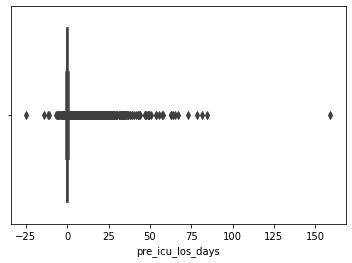

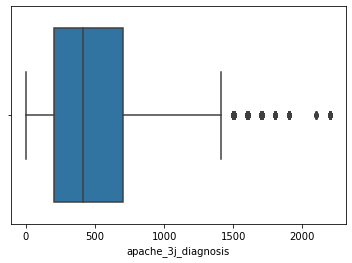

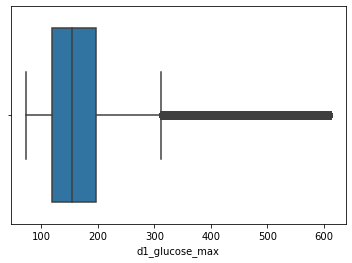

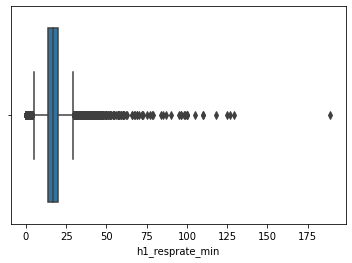

In [20]:
-

In [21]:
l1 = ['pre_icu_los_days','apache_3j_diagnosis','d1_glucose_max','h1_resprate_min']
print(len(data))

for x in data.columns:
    if(x in l1):
        print(x)
        h = data[x].mean() + 3*data[x].std()
        l = data[x].mean() - 3*data[x].std()
        print("Highest allowed",h)
        print("Lowest allowed",l)
        data = data[(data[x] < h) & (data[x] > l)]
        print('------------------------------------')
        
len(data)

91713
pre_icu_los_days
Highest allowed 8.299034570117998
Lowest allowed -6.627502468781986
------------------------------------
apache_3j_diagnosis
Highest allowed 1932.9824500310822
Lowest allowed -820.1481650622866
------------------------------------
h1_resprate_min
Highest allowed 34.915730093231744
Lowest allowed -0.5237484777712247
------------------------------------
d1_glucose_max
Highest allowed 426.6102064249071
Lowest allowed -77.68414242067217
------------------------------------


87014

# ENCODING

In [22]:
for x in data.columns:
    if(data[x].dtype=='object'):
        print(data[x].value_counts())
        print('------------------------------')

Caucasian           68722
African American     8837
Other/Unknown        4086
Hispanic             3570
Asian                1064
Native American       735
Name: ethnicity, dtype: int64
------------------------------
M    47054
F    39960
Name: gender, dtype: int64
------------------------------
Accident & Emergency         51813
Operating Room / Recovery    17967
Floor                        14133
Other Hospital                2299
Other ICU                      802
Name: icu_admit_source, dtype: int64
------------------------------
admit       81842
transfer     4692
readmit       480
Name: icu_stay_type, dtype: int64
------------------------------
Med-Surg ICU    47793
Neuro ICU        7505
MICU             7150
CCU-CTICU        6870
SICU             4932
Cardiac ICU      4515
CSICU            4452
CTICU            3797
Name: icu_type, dtype: int64
------------------------------
Cardiovascular          30468
Neurological            11619
Respiratory             10940
Sepsis         

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_binarizer = preprocessing.LabelBinarizer()

In [24]:
for col in data.columns:
    if(data[col].dtype=='object'):
        if(col == 'gender' ):
            data[col] = label_binarizer.fit_transform(data[col])
        else:
            data[col] = label_encoder.fit_transform(data[col])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87014 entries, 0 to 91712
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            87014 non-null  float64
 1   bmi                            87014 non-null  float64
 2   elective_surgery               87014 non-null  float64
 3   ethnicity                      87014 non-null  int32  
 4   gender                         87014 non-null  int32  
 5   height                         87014 non-null  float64
 6   icu_admit_source               87014 non-null  int32  
 7   icu_stay_type                  87014 non-null  int32  
 8   icu_type                       87014 non-null  int32  
 9   pre_icu_los_days               87014 non-null  float64
 10  weight                         87014 non-null  float64
 11  apache_2_diagnosis             87014 non-null  float64
 12  apache_3j_diagnosis            87014 non-null 

# CORRELATION

<AxesSubplot:>

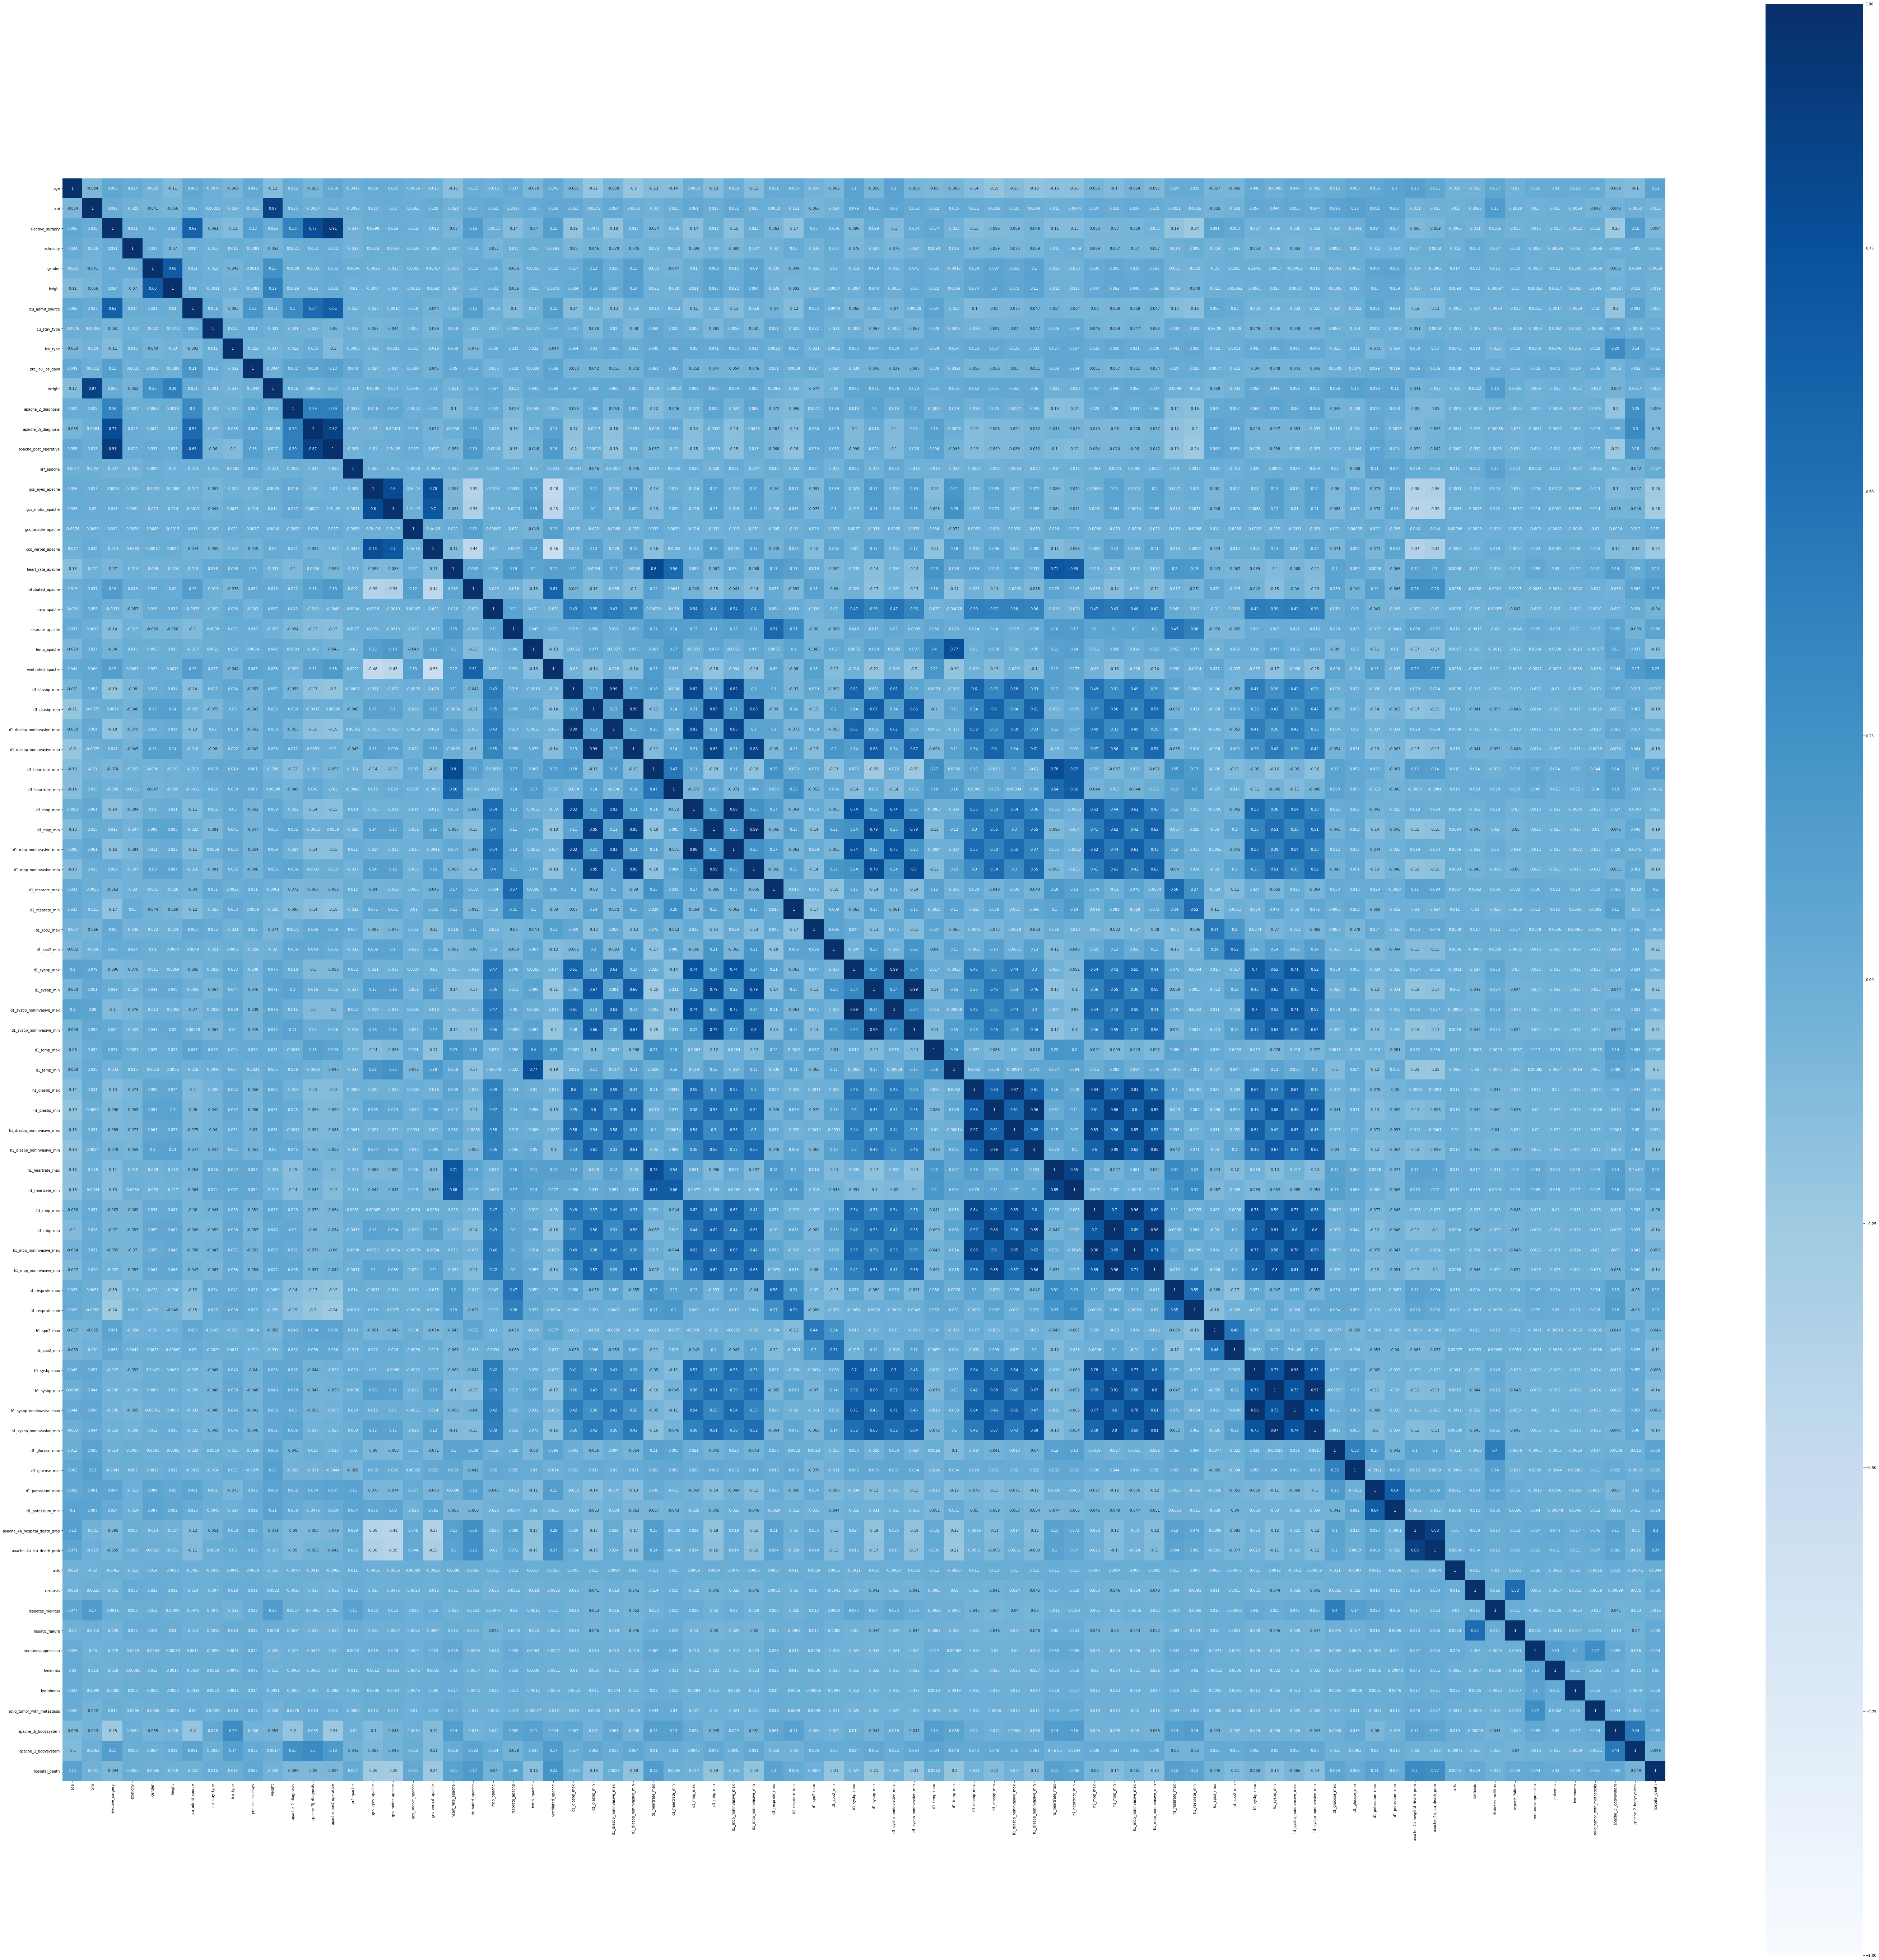

In [9]:
plt.figure(figsize = (100, 100))
sns.heatmap(data.corr(), cbar=True, square=True, annot=True, cmap='Blues',vmin = -1)

In [26]:
Corr_Matrix = round(data.corr(),4)
print(Corr_Matrix['hospital_death'])

age                              0.1054
bmi                             -0.0309
elective_surgery                -0.0932
ethnicity                        0.0056
gender                          -0.0061
height                          -0.0171
icu_admit_source                -0.0255
icu_stay_type                    0.0177
icu_type                         0.0170
pre_icu_los_days                 0.0417
weight                          -0.0370
apache_2_diagnosis              -0.0867
apache_3j_diagnosis             -0.0855
apache_post_operative           -0.0823
arf_apache                       0.0242
gcs_eyes_apache                 -0.2525
gcs_motor_apache                -0.2742
gcs_unable_apache                0.0521
gcs_verbal_apache               -0.2333
heart_rate_apache                0.1032
intubated_apache                 0.1658
map_apache                      -0.0362
resprate_apache                  0.0779
temp_apache                     -0.1539
ventilated_apache                0.2217


In [27]:
for i in Corr_Matrix['hospital_death'].iteritems():
    if(abs(i[1])<0.005):
        print(i)
        del data[i[0]]

('d1_diasbp_max', 0.004)
('d1_diasbp_noninvasive_max', 0.0045)
('aids', 0.004)


In [28]:
columns = list(data.columns)
print(columns)

['age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_min', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_m

In [29]:
li = ['apache_post_operative',
     'd1_diasbp_noninvasive_max',
     'd1_diasbp_noninvasive_min',
     'd1_mbp_noninvasive_max',
     'd1_mbp_noninvasive_min',
     'd1_sysbp_noninvasive_max',
     'd1_sysbp_noninvasive_min',
     'h1_diasbp_noninvasive_max',
     'h1_diasbp_noninvasive_min',
     'h1_heartrate_min',
     'h1_mbp_noninvasive_max',
     'h1_mbp_noninvasive_min',
     'h1_sysbp_noninvasive_max',
     'h1_sysbp_noninvasive_min',
     'apache_4a_icu_death_prob',
     'd1_mbp_min',
     'gcs_motor_apache',
     'd1_heartrate_min',
     'd1_mbp_max',
     'd1_mbp_min',
     'h1_mbp_max',
     'h1_mbp_min']
li=list(set(li))

In [30]:
for i in li:
    if(i in columns):
        del data[i]

In [31]:
len(list(data.columns))

57

# Saving Data - 2

In [33]:
data.to_csv("modified_data.csv")

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", None)

# Import psql to run queries 

import pandasql as psql

data = pd.read_csv('modified_data.csv',header=0)

# DATA INTO X AND Y

In [2]:
ind=[]
for col in data.columns:
    if col!='hospital_death':
        ind.append(col)
        
tar='hospital_death'
x=data[ind]
y=data[tar]

print(x.shape)
print(y.shape)

(87014, 57)
(87014,)


# RANDOM OVER SAMPLING

In [3]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.25)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

a,b = y_over.value_counts()
print(a,b)
print(a/b)

(99862, 57)
(99862,)
79890 19972
4.000100140196275


# SPLITTING AND NORMALIZATION

In [4]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, stratify=y_over , random_state = 42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((69903, 57), (29959, 57), (69903,), (29959,))

In [5]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [7]:
CSResults = pd.read_csv("CSResults.csv",header=0)

CSResults.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 2815  3177]
 [ 1309 22658]]
Outcome values : 
 2815 3177 1309 22658
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.47      0.56      5992
           0       0.88      0.95      0.91     23967

    accuracy                           0.85     29959
   macro avg       0.78      0.71      0.73     29959
weighted avg       0.84      0.85      0.84     29959

Accuracy : 85.0 %
Precision : 68.3 %
Recall : 47.0 %
F1 Score : 0.557
Specificity or True Negative Rate : 94.5 %
Balanced Accuracy : 70.8 %
MCC : 0.482
roc_auc_score: 0.708


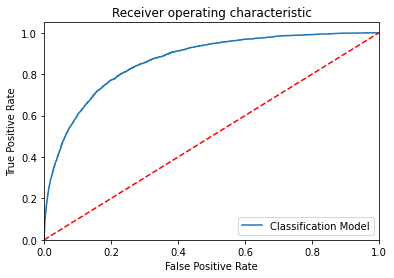

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 4471  1521]
 [ 3405 20562]]
Outcome values : 
 4471 1521 3405 20562
Classification report : 
               precision    recall  f1-score   support

           1       0.57      0.75      0.64      5992
           0       0.93      0.86      0.89     23967

    accuracy                           0.84     29959
   macro avg       0.75      0.80      0.77     29959
weighted avg       0.86      0.84      0.84     29959

Accuracy : 83.6 %
Precision : 56.8 %
Recall : 74.6 %
F1 Score : 0.645
Specificity or True Negative Rate : 85.8 %
Balanced Accuracy : 80.2 %
MCC : 0.549
roc_auc_score: 0.802


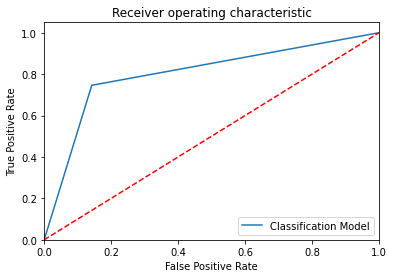

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 5278   714]
 [  485 23482]]
Outcome values : 
 5278 714 485 23482
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.88      0.90      5992
           0       0.97      0.98      0.98     23967

    accuracy                           0.96     29959
   macro avg       0.94      0.93      0.94     29959
weighted avg       0.96      0.96      0.96     29959

Accuracy : 96.0 %
Precision : 91.6 %
Recall : 88.1 %
F1 Score : 0.898
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 93.0 %
MCC : 0.873
roc_auc_score: 0.93


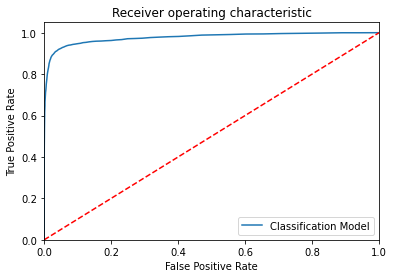

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 5297   695]
 [  231 23736]]
Outcome values : 
 5297 695 231 23736
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.88      0.92      5992
           0       0.97      0.99      0.98     23967

    accuracy                           0.97     29959
   macro avg       0.96      0.94      0.95     29959
weighted avg       0.97      0.97      0.97     29959

Accuracy : 96.9 %
Precision : 95.8 %
Recall : 88.4 %
F1 Score : 0.92
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 93.7 %
MCC : 0.902
roc_auc_score: 0.937


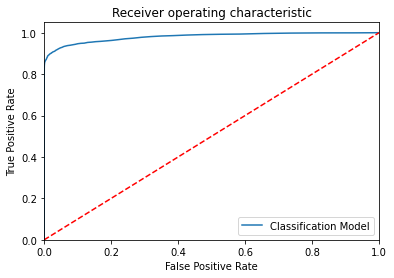

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 3517  2475]
 [ 1768 22199]]
Outcome values : 
 3517 2475 1768 22199
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.59      0.62      5992
           0       0.90      0.93      0.91     23967

    accuracy                           0.86     29959
   macro avg       0.78      0.76      0.77     29959
weighted avg       0.85      0.86      0.85     29959

Accuracy : 85.8 %
Precision : 66.5 %
Recall : 58.7 %
F1 Score : 0.624
Specificity or True Negative Rate : 92.6 %
Balanced Accuracy : 75.6 %
MCC : 0.539
roc_auc_score: 0.757


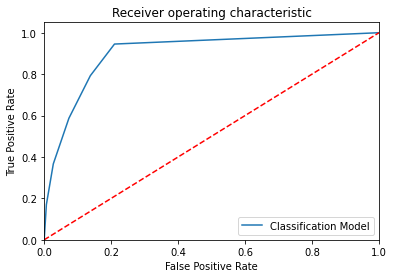

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 2794  3198]
 [  812 23155]]
Outcome values : 
 2794 3198 812 23155
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.47      0.58      5992
           0       0.88      0.97      0.92     23967

    accuracy                           0.87     29959
   macro avg       0.83      0.72      0.75     29959
weighted avg       0.86      0.87      0.85     29959

Accuracy : 86.6 %
Precision : 77.5 %
Recall : 46.6 %
F1 Score : 0.582
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 71.6 %
MCC : 0.532
roc_auc_score: 0.716


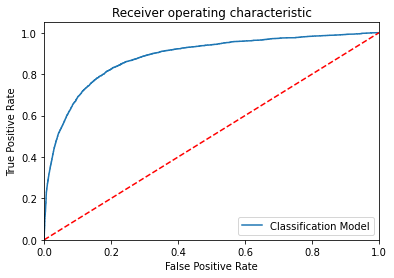

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 5079   913]
 [  637 23330]]
Outcome values : 
 5079 913 637 23330
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.85      0.87      5992
           0       0.96      0.97      0.97     23967

    accuracy                           0.95     29959
   macro avg       0.93      0.91      0.92     29959
weighted avg       0.95      0.95      0.95     29959

Accuracy : 94.8 %
Precision : 88.9 %
Recall : 84.8 %
F1 Score : 0.868
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 91.0 %
MCC : 0.836
roc_auc_score: 0.911


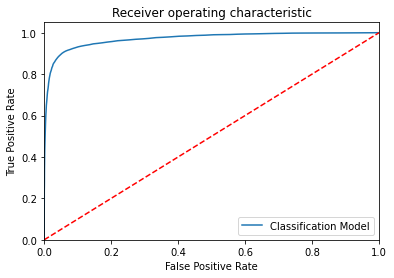

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 3258  2734]
 [ 1371 22596]]
Outcome values : 
 3258 2734 1371 22596
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.54      0.61      5992
           0       0.89      0.94      0.92     23967

    accuracy                           0.86     29959
   macro avg       0.80      0.74      0.77     29959
weighted avg       0.85      0.86      0.86     29959

Accuracy : 86.3 %
Precision : 70.4 %
Recall : 54.4 %
F1 Score : 0.614
Specificity or True Negative Rate : 94.3 %
Balanced Accuracy : 74.4 %
MCC : 0.538
roc_auc_score: 0.743


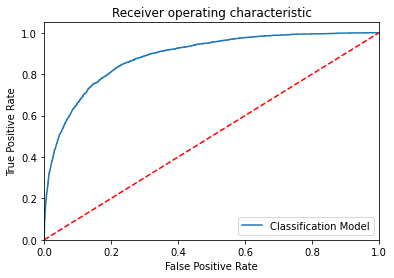

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 3352  2640]
 [ 1146 22821]]
Outcome values : 
 3352 2640 1146 22821
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.56      0.64      5992
           0       0.90      0.95      0.92     23967

    accuracy                           0.87     29959
   macro avg       0.82      0.76      0.78     29959
weighted avg       0.87      0.87      0.87     29959

Accuracy : 87.4 %
Precision : 74.5 %
Recall : 55.9 %
F1 Score : 0.639
Specificity or True Negative Rate : 95.2 %
Balanced Accuracy : 75.6 %
MCC : 0.573
roc_auc_score: 0.756


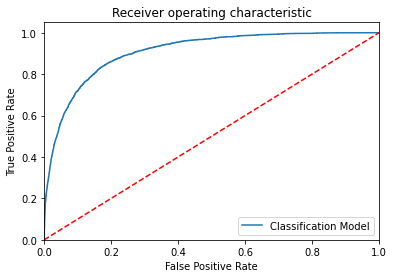

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 4266  1726]
 [ 5223 18744]]
Outcome values : 
 4266 1726 5223 18744
Classification report : 
               precision    recall  f1-score   support

           1       0.45      0.71      0.55      5992
           0       0.92      0.78      0.84     23967

    accuracy                           0.77     29959
   macro avg       0.68      0.75      0.70     29959
weighted avg       0.82      0.77      0.79     29959

Accuracy : 76.8 %
Precision : 45.0 %
Recall : 71.2 %
F1 Score : 0.551
Specificity or True Negative Rate : 78.2 %
Balanced Accuracy : 74.7 %
MCC : 0.425
roc_auc_score: 0.747


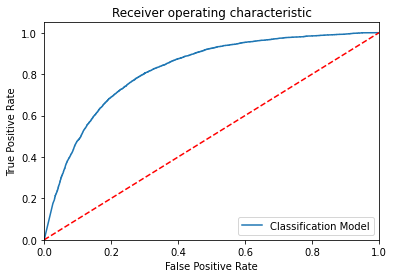

-----------------------------------------------------------------------------------------------------


In [45]:
# Build the Calssification models with Over Sampling and compare the results
from math import sqrt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET=ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF,ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Assign values
#x_train = xo_train
    #x_test = xo_test
    #y_train = yo_train
    #y_test = yo_test
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': MCC,
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)

In [46]:
CSResults

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),2815,3177,1309,22658,0.850,0.683,0.470,0.557,0.945,0.482,0.707588,0.708
1,DecisionTreeClassifier(),4471,1521,3405,20562,0.836,0.568,0.746,0.645,0.858,0.549,0.802046,0.802
2,"(DecisionTreeClassifier(max_features='sqrt', r...",5278,714,485,23482,0.960,0.916,0.881,0.898,0.980,0.873,0.930302,0.930
3,"(ExtraTreeClassifier(random_state=759422162), ...",5297,695,231,23736,0.969,0.958,0.884,0.920,0.990,0.902,0.937187,0.937
4,KNeighborsClassifier(),3517,2475,1768,22199,0.858,0.665,0.587,0.624,0.926,0.539,0.756591,0.756
5,SVC(probability=True),2794,3198,812,23155,0.866,0.775,0.466,0.582,0.966,0.532,0.716204,0.716
6,(DecisionTreeClassifier(random_state=210967370...,5079,913,637,23330,0.948,0.889,0.848,0.868,0.973,0.836,0.910526,0.910
7,([DecisionTreeRegressor(criterion='friedman_ms...,3258,2734,1371,22596,0.863,0.704,0.544,0.614,0.943,0.538,0.743261,0.744
8,LGBMClassifier(),3352,2640,1146,22821,0.874,0.745,0.559,0.639,0.952,0.573,0.755798,0.756
9,GaussianNB(),4266,1726,5223,18744,0.768,0.450,0.712,0.551,0.782,0.425,0.747012,0.747


In [47]:
CSResults.to_csv("Final_Res.csv")

# Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

GS_grid = {
           'n_estimators': [1150, 1200, 1250, 1300,1350],
           'criterion':['entropy','gini']
           }

# Create object for model

ModelET = ExtraTreesClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelET, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 5277   715]
 [  253 23714]]
Outcome values : 
 5277 715 253 23714
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.88      0.92      5992
           0       0.97      0.99      0.98     23967

    accuracy                           0.97     29959
   macro avg       0.96      0.94      0.95     29959
weighted avg       0.97      0.97      0.97     29959

Accuracy : 96.8 %
Precision : 95.4 %
Recall : 88.1 %
F1 Score : 0.916
Specificity or True Negative Rate : 98.9 %
Balanced Accuracy : 93.5 %
MCC : 0.897
roc_auc_score: 0.935


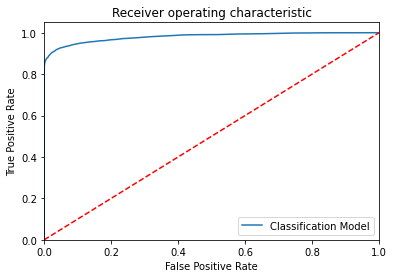

In [8]:
#Extra Trees Classifier Python Code
#modeling 
from sklearn.ensemble import ExtraTreesClassifier
models = ExtraTreesClassifier ()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)
# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)


# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 5265   727]
 [  469 23498]]
Outcome values : 
 5265 727 469 23498
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.88      0.90      5992
           0       0.97      0.98      0.98     23967

    accuracy                           0.96     29959
   macro avg       0.94      0.93      0.94     29959
weighted avg       0.96      0.96      0.96     29959

Accuracy : 96.0 %
Precision : 91.8 %
Recall : 87.9 %
F1 Score : 0.898
Specificity or True Negative Rate : 98.0 %
Balanced Accuracy : 93.0 %
MCC : 0.874
roc_auc_score: 0.93


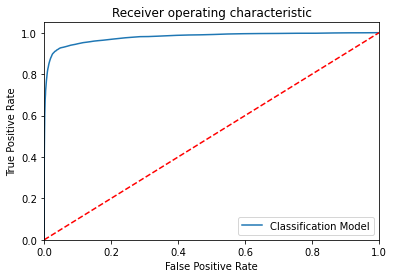

In [10]:
#Random Forest Classifier Python Code
#modeling 
from sklearn.ensemble import RandomForestClassifier
models = RandomForestClassifier()
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)
# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)


# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 5078   914]
 [  658 23309]]
Outcome values : 
 5078 914 658 23309
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.85      0.87      5992
           0       0.96      0.97      0.97     23967

    accuracy                           0.95     29959
   macro avg       0.92      0.91      0.92     29959
weighted avg       0.95      0.95      0.95     29959

Accuracy : 94.8 %
Precision : 88.5 %
Recall : 84.7 %
F1 Score : 0.866
Specificity or True Negative Rate : 97.3 %
Balanced Accuracy : 91.0 %
MCC : 0.834
roc_auc_score: 0.91


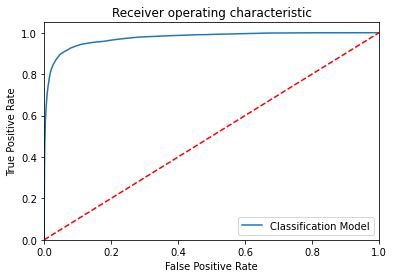

In [8]:
#Bagging Classifier Python Code
#modeling 
from sklearn.ensemble import BaggingClassifier
models = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)
models.fit(x_train, y_train)
# Prediction
y_pred = models.predict(x_test)
y_pred_prob = models.predict_proba(x_test)
# Print the model name
print('Model Name: ', models)
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# actual values
actual = y_test
# predicted values
predicted = y_pred
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)
# classification report for precision, recall f1-score and accuracy
C_Report = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', C_Report)
# calculating the metrics
sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);
# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model
from math import sqrt
mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)
# Area under ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
